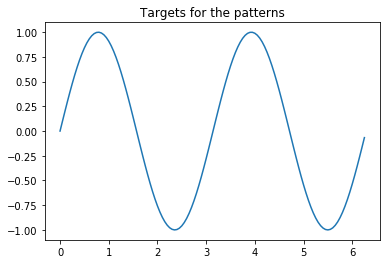

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math
np.random.seed(42)

"""Generate data"""
trainSet = np.arange(0, 2*np.pi, 0.1)#List of [0, 6.2]. 63 elements

testSet = np.arange(0.05, 2*np.pi, 0.1) #List of [0.05, 6.25]. 63 elements

trainTargetSin = np.sin(2*trainSet)
#trainTargetSin += np.random.normal(0,math.sqrt(0.1),trainTargetSin.shape[0]) #Add noise
testTargetSin = np.sin(2*testSet)
#testTargetSin += np.random.normal(0,math.sqrt(0.1),testTargetSin.shape[0]) #Add noise

#Plot to visualize
plotSin = np.stack((trainTargetSin, testTargetSin), axis=1).flatten()
plotX = np.stack((trainSet, testSet), axis=1).flatten()
plt.plot(plotX, plotSin)
plt.title("Targets for the patterns")
plt.show()

In [2]:
class LeastSquares:
    def __init__(self, train, trainTarget, prototypes):
        self.train = train
        self.trainTarget = trainTarget
        self.prototypes = prototypes
        self.nodes = prototypes.size
        self.beta = np.ones(self.prototypes.size) #Variance - now set to equal for all
        self.phi = self.createPhi()
        self.weights = self.trainWeights()
        
    def createPhi(self):
        """Calls activation to calulate for each row. Puts them together to create phi matrix"""
        p = np.zeros((self.train.size, self.nodes))
        c = 0
        for x in self.train:
            p[:][c] = self.activation(x)
            c += 1
        return p
        
    def activation(self, pattern): 
        """Gauss simplified e^(-beta(x-mu)^2). Calculates for each row"""
        return np.e**(np.multiply(-1*self.beta, (pattern-self.prototypes)**2))
        
    def trainWeights(self):
        """Calculating W = (phi^T * phi)^-1 * phi^T * f. Split for easier reading"""
        phiphi = np.linalg.inv(np.dot(np.transpose(self.phi), self.phi)) #(phi^T * phi)^-1
        phif = np.dot(np.transpose(self.phi), self.trainTarget) #phi^T * f
        return np.dot(phiphi, phif)
        
    def run(self, patterns):
        res = np.zeros(patterns.size)
        c = 0
        for x in patterns:
            res[c] = sum(np.multiply(self.weights, self.activation(x)))
            c += 1
        return res

    def residualError(self, patterns, targets):
        """Calculates residual error"""
        res = self.run(patterns)
        diff = np.absolute(res-targets)
        return np.average(diff)
  
        

In [3]:
class DeltaRule:
    def __init__(self, train, trainTarget, prototypes, step=0.01, maxEpoch=200):
        self.train = train
        self.trainTarget = trainTarget
        self.prototypes = prototypes
        self.nodes = prototypes.size
        self.step = step
        self.beta = np.ones(self.prototypes.size) #Variance - now set to equal for all
        self.weights = np.ones(self.prototypes.size)
        self.epoch = 0
        self.maxEpoch = maxEpoch
        self.errThreshold = 0.1
        self.mainLoop()
        
    def mainLoop(self):
        while self.epoch < self.maxEpoch:
            for i in range(self.train.size):
                self.weights += self.deltaWeights(i)
                if self.residualError(self.train, self.trainTarget) < self.errThreshold:
                    return
            self.epoch += 1
            #if self.epoch%20 == 0:
                #print(self.epoch, " ", self.residualError(self.train, self.trainTarget))
            
    def deltaWeights(self, index):
        a = self.trainTarget[index] - np.dot(self.activation(self.train[index]), self.weights)
        b = self.step * a
        return b * self.activation(self.train[index])
        
    def activation(self, pattern): 
        """Gauss simplified e^(-beta(x-mu)^2). Calculates for each row"""
        return np.e**(np.multiply(-1*self.beta, (pattern-self.prototypes)**2))
        
    def run(self, patterns):
        res = np.zeros(patterns.size)
        c = 0
        for x in patterns:
            res[c] = sum(np.multiply(self.weights, self.activation(x)))
            c += 1
        return res

    def residualError(self, patterns, targets):
        """Calculates residual error"""
        res = self.run(patterns)
        diff = np.absolute(res-targets)
        return np.average(diff)
    

In [4]:
index = np.linspace(0, trainSet.size-1, num = 29, dtype= int)
b = DeltaRule(trainSet, trainTargetSin, trainSet[index], 0.01, 100)

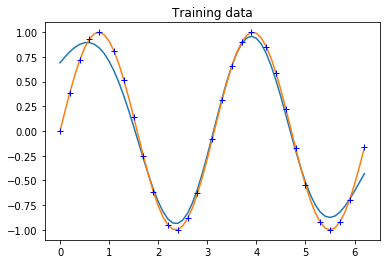

Residual error:  0.09992873955


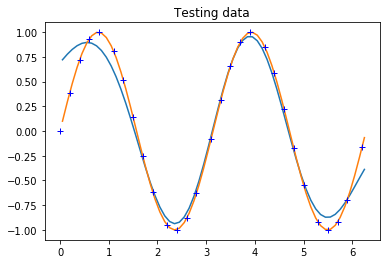

Residual error:  0.0970174260649


In [5]:
plt.plot(trainSet, b.run(trainSet))
plt.plot(trainSet, trainTargetSin)
plt.plot(trainSet[index], trainTargetSin[index], "b+")
plt.title("Training data")
plt.show()
print("Residual error: ", b.residualError(trainSet, trainTargetSin))

"""Checking testing data error for 10 nodes"""
plt.plot(testSet, b.run(testSet))
plt.plot(testSet, testTargetSin)
plt.plot(trainSet[index], trainTargetSin[index], "b+")
plt.title("Testing data")
plt.show()
print("Residual error: ", b.residualError(testSet, testTargetSin))

In [6]:
"""Comparing residual error for train/test data for different number of nodes in hidden layer.
The prototypes here are evenly spaced"""
print("Nodes - Training Error   -   Testing Error")
for i in range(1, trainSet.size + 1):
    index = np.linspace(0, trainSet.size-1, num = i, dtype= int)
    dr = DeltaRule(trainSet, trainTargetSin, trainSet[index], 0.01, 100)
    print(i, "  -  ", dr.residualError(trainSet, trainTargetSin), "  -  ", dr.residualError(testSet, testTargetSin))
     

Nodes - Training Error   -   Testing Error
1   -   0.583742701703   -   0.577022341464
2   -   0.515474656103   -   0.513978879353
3   -   0.515423461012   -   0.513987849608
4   -   0.402049526933   -   0.402334458803
5   -   0.499807864602   -   0.501084934383
6   -   0.134259005221   -   0.135497120016
7   -   0.0999897332939   -   0.099658302019
8   -   0.0999203257471   -   0.0990066579789
9   -   0.0999573909369   -   0.0988030054459
10   -   0.0999985939378   -   0.0988538997683
11   -   0.0999573613734   -   0.0991154222958
12   -   0.0999431888025   -   0.0985833975209
13   -   0.0998970875137   -   0.0986373470199
14   -   0.0999948585349   -   0.0987764783742
15   -   0.0999917446007   -   0.0990261192866
16   -   0.0999063980434   -   0.0979071873168
17   -   0.0999938259689   -   0.0984913148071
18   -   0.0999718914935   -   0.0981009767484
19   -   0.0999909198614   -   0.0979323398533
20   -   0.0999478223956   -   0.0976958085328
21   -   0.099768018394   -   0.0973504

In [7]:
#SIN

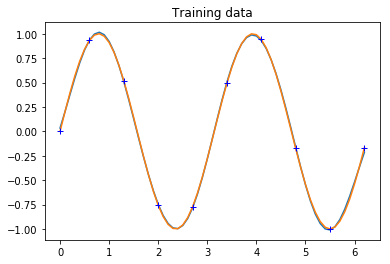

Residual error:  0.0109433642875


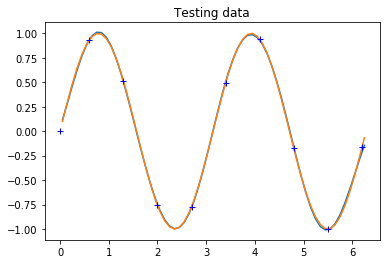

Residual error:  0.0114592418722


In [8]:
"""Checking training data error for 10 nodes"""
index = np.linspace(0, trainSet.size-1, num = 10, dtype= int)
a = LeastSquares(trainSet, trainTargetSin, trainSet[index])
plt.plot(trainSet, a.run(trainSet))
plt.plot(trainSet, trainTargetSin)
plt.plot(trainSet[index], trainTargetSin[index], "b+")
plt.title("Training data")
plt.show()
print("Residual error: ", a.residualError(trainSet, trainTargetSin))

"""Checking testing data error for 10 nodes"""
plt.plot(testSet, a.run(testSet))
plt.plot(testSet, testTargetSin)
plt.plot(trainSet[index], trainTargetSin[index], "b+")
plt.title("Testing data")
plt.show()
print("Residual error: ", a.residualError(testSet, testTargetSin))

In [9]:
"""Comparing residual error for train/test data for different number of nodes in hidden layer.
The prototypes here are evenly spaced"""
print("Nodes - Training Error   -   Testing Error")
for i in range(1, trainSet.size + 1):
    index = np.linspace(0, trainSet.size-1, num = i, dtype= int)
    ls = LeastSquares(trainSet, trainTargetSin, trainSet[index])
    print(i, "  -  ", ls.residualError(trainSet, trainTargetSin), "  -  ", ls.residualError(testSet, testTargetSin))
        

Nodes - Training Error   -   Testing Error
1   -   0.583956639739   -   0.577148105464
2   -   0.515493969769   -   0.514204650237
3   -   0.514920512299   -   0.514280775436
4   -   0.401847312033   -   0.402498063209
5   -   0.498979558625   -   0.501796089893
6   -   0.136974736335   -   0.139566055483
7   -   0.0440760424417   -   0.0450981050415
8   -   0.0214239937824   -   0.0218427738672
9   -   0.0189990663867   -   0.0191883276986
10   -   0.0109433642875   -   0.0114592418722
11   -   0.00981036041078   -   0.0103318433123
12   -   0.00446144846614   -   0.00467623408733
13   -   0.00392730433694   -   0.00400358118129
14   -   0.00146652427578   -   0.00153424334774
15   -   0.00122941673104   -   0.00125449889416
16   -   0.000423196047316   -   0.000465408837486
17   -   0.000315647918292   -   0.000349259121084
18   -   0.000117789503116   -   0.000133125145922
19   -   0.00558144352358   -   0.00510236224513
20   -   0.0154279804804   -   0.0140840747887
21   -   2.3928

In [10]:
"""Comparing residual error for train/test data for different number of nodes in hidden layer.
The prototypes here are clustered from index 0 and forward"""
print("Nodes - Training Error   -   Testing Error")
for i in range(1, trainSet.size + 1):
    ls = LeastSquares(trainSet, trainTargetSin, trainSet[0:i])
    print(i, "  -  ", ls.residualError(trainSet, trainTargetSin), "  -  ", ls.residualError(testSet, testTargetSin))

Nodes - Training Error   -   Testing Error
1   -   0.583956639739   -   0.577148105464
2   -   0.515768763789   -   0.514903063841
3   -   0.518059720863   -   0.513862870554
4   -   0.479161557208   -   0.475653568925
5   -   0.416416494568   -   0.413761998136
6   -   0.364208011202   -   0.363775362735
7   -   0.35224951215   -   0.35299360082
8   -   0.374823722932   -   0.374409820881
9   -   0.372116668861   -   0.368375423128
10   -   0.377643235157   -   0.378815636659
11   -   15.8471193601   -   15.2230106246
12   -   0.35752278725   -   0.35460416166
13   -   0.396970308233   -   0.394587684386
14   -   0.300218622145   -   0.29980539132
15   -   0.819872971462   -   0.776101672862
16   -   0.316776100825   -   0.311803205731
17   -   1.40220602648   -   1.32329227235
18   -   1.56354847065   -   1.54745792076
19   -   0.584238359801   -   0.568896938112
20   -   0.728659798637   -   0.696370450284
21   -   0.490062411992   -   0.476097409818
22   -   5.14590177801   -   4.8